In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [6]:
df = pd.read_csv(r"C:\Users\RDITLBMJ\Documents\Data_ML\water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [8]:
# Filling Null Values using K-Nearest Neighbor Imputation
impute_knn = KNNImputer(n_neighbors=5)
df_imputed = impute_knn.fit_transform(df)

In [10]:
# Converting New Array to a DataFrame
df = pd.DataFrame(df_imputed, columns=['ph', 'Hardness',	'Solids', 'Chloramines', 'Sulfate',	'Conductivity',	'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'])
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.156857,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,336.094350,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,330.449166,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,364.091541,392.449580,19.903225,64.327280,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,327.357588,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,325.952434,402.883113,11.168946,77.488213,4.708658,1.0


In [12]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [14]:
X = df.iloc[:, 0:8]
y = df.iloc[:, 9]

In [17]:
# Standardizing Data Using Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [114]:
# Standardizing Data Using Standard Scaler
scaler = StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)

In [23]:
# Initialization of Random Forest Classifier Model
rf = RandomForestClassifier()

In [25]:
# Training Model using all Features
rf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
# Making Predictions
y_pred = rf.predict(X_test)

In [29]:
# Evaluation of Model
rf.score(X_test,y_test)

0.6615853658536586

In [31]:
# Feature Selection Using Recursive Feature Elimination with Random Forest Classifier as Model
from sklearn.feature_selection import RFE
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

rfe_f1_score_list = []

for k in range(1, 9):
    RFE_selector = RFE(estimator=rf, n_features_to_select=k, step=1)
    RFE_selector.fit(X_train_v1, y_train_v1)

    sel_X_train_v1 = RFE_selector.transform(X_train_v1)
    sel_X_test_v1 = RFE_selector.transform(X_test_v1)

    rf.fit(sel_X_train_v1, y_train_v1)
    RFE_preds = rf.predict(sel_X_test_v1)

    f1_score_rfe = round(f1_score(y_test_v1, RFE_preds, average='weighted'), 3)

    rfe_f1_score_list.append(f1_score_rfe)

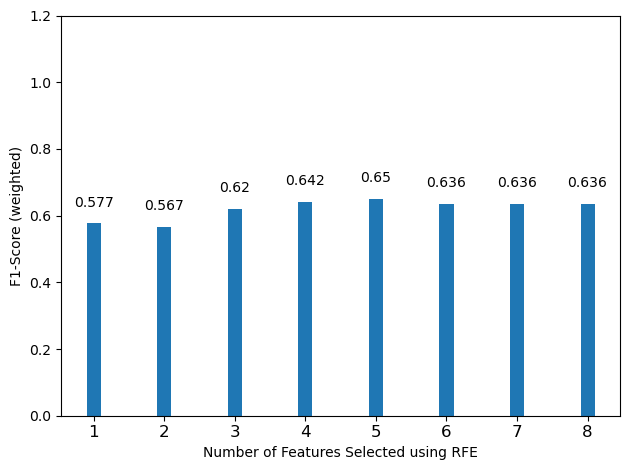

In [33]:
# Visualization of Feature Selection from Recursive Feature Elimination
fig, ax = plt.subplots()

x = np.arange(1, 9)
y = rfe_f1_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of Features Selected using RFE')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 9))
ax.set_xticklabels(np.arange(1, 9), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')


plt.tight_layout()

In [35]:
# Initializing New Model with Best Selected Features
rf2 = RandomForestClassifier()

In [37]:
# Training Model with Best Selected Features
rf2.fit(sel_X_train_v1, y_train_v1)

RandomForestClassifier()

In [39]:
# Making Predictions with Best Selected Features
y_pred2 = rf2.predict(sel_X_test_v1)

In [41]:
# Evaluation of New Model with Best Selected Features
rf2.score(sel_X_test_v1,y_test_v1)

0.6692073170731707

In [45]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_v1, y_pred2))

              precision    recall  f1-score   support

         0.0       0.69      0.86      0.77       412
         1.0       0.59      0.35      0.44       244

    accuracy                           0.67       656
   macro avg       0.64      0.60      0.60       656
weighted avg       0.65      0.67      0.64       656



In [47]:
# Displaying Features with most importance
features = pd.DataFrame(rf.feature_importances_, index = X.columns)
features

,0
ph,0.139153
Hardness,0.131527
Solids,0.122494
Chloramines,0.123411
Sulfate,0.149733
Conductivity,0.112867
Organic_carbon,0.113184
Trihalomethanes,0.107630


In [49]:
# Initializing New Model with Hyperparameters
rf3 = RandomForestClassifier(n_estimators = 1000, 
                             criterion = 'entropy',
                             min_samples_split = 10,
                             max_depth = 14,
                             random_state = 42
    
)

In [51]:
# Training New Model with Hyperparameters
rf3.fit(sel_X_train_v1, y_train_v1)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [53]:
# Making predictions with Hyperparameters
y_pred3 = rf3.predict(sel_X_test_v1)

In [55]:
# Evaluation of model with Hyperparameters
rf3.score(sel_X_test_v1,y_test_v1)

0.6692073170731707